<font size="+3"><strong>Location or Size: What Influences House Prices in Mexico?</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo

You've wrangled the data, you've gained an understanding of its basic characteristics in your EDA, and now it's time to ask some research questions. 

# Import Data

**Task 1.4.1:** Read the CSV file that you created in the last notebook (`"../small-data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

- [What's a DataFrame?](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [What's a CSV file?](../%40textbook/03-pandas-getting-started.ipynb#CSV-Files)
- [Read a CSV file into a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [3]:
df = pd.read_csv("../data/mexico-real-estate-clean.csv")

# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group. 

In [4]:
VimeoVideo("656378731", h="8daa35d1e8", width=600)

**Task 1.4.2:** Use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 

- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data using the `groupby` method in pandas.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)

In [5]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          132542.931477
Nuevo León                         130560.765932
Guanajuato                         128933.559000
Jalisco                            123683.233784
Quintana Roo                       123481.853913
Guerrero                           123105.097407
Morelos                            122963.815179
Distrito Federal                   122923.076038
Puebla                             122794.490000
Campeche                           121734.633333
Estado de México                   121306.963016
Baja California Sur                116051.237778
Sonora                             114788.850000
Yucatán                            108759.922143
Chiapas                            108239.040714
Hidalgo                            106915.692000
Aguascalientes                     105555.603333
Chihuahua                          103390.629167
San Luis Potosí                     96403.794737
Veracruz de Ignacio de la Llave     95852.838537
Tabasco       

In [6]:
VimeoVideo("656378435", h="b3765f3339", width=600)

**Task 1.4.3:** Use `mean_price_by_state` to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean House Price by State"`.

- [Create a bar chart using pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts) 

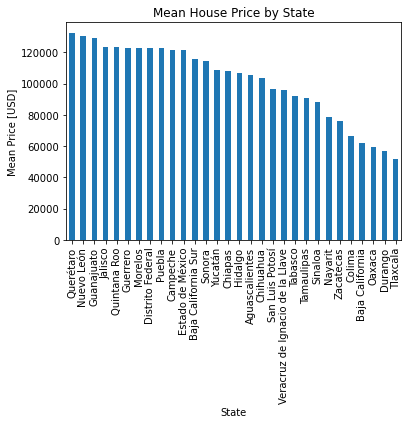

In [7]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
);